# Práctica Guiada de Laboratorio 9 - Inteligencia Artificial G1 (EAPIS) 2022-1

# Implementación de un Perceptrón Unicapa (PU) estándar

### Prof. Rolando A. Maguiña Pérez

## Introducción

En esta Práctica Guiada se presenta la construcción en Python, usando su biblioteca NumPy, del algoritmo de aprendizaje del Perceptrón Unicapa para resolver problemas genéricos de clasificación. Dicho algoritmo corresponde al presentado en las sesiones de teoría.

Luego de presentar dicha construcción y su aplicación para resolver el problema de la implementación del operador lógico NAND, se pide resolver algunos ejercicios referidos al denominado problema de los vinos. Previamente, se pedirá resolver algunos ejercicios sobre la carga del dataset para dicho problema, y la determinación de los conjuntos de datos a usar en el entrenamiento de la red y en la validación del mismo.

## Construcción del PU

Para la construcción de la red Perceptrón Unicapa se tomará en cuenta su algoritmo de aprendizaje mostrado a continuación y la sgte nomenclatura:

- Z: número de instancias (muestras) en el conjunto de datos
- N: número de atributos o variables de entrada
- M: número de atributos o variables de salida
- 't': vector de salidas esperadas o targets
- 'y': vector de salidas estimadas por la red.

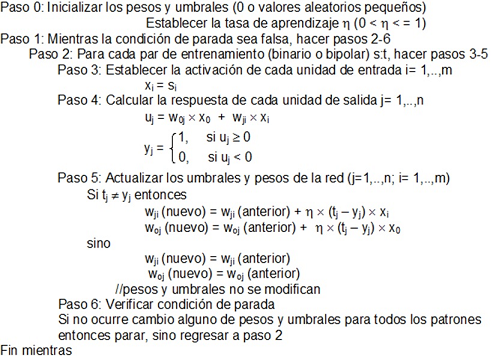

Se calcula la suma ponderada de las entradas por sus respectivos pesos (o, equivalentemente, producto escalar de la matriz de pesos por el vector de entrada actual); esto constituye la función de propagación. El resultado obtenido se denomina entrada neta, 'u', y es tomado como argumento de la función de activación; como tal, se utilizará la función escalón. 

La función de aprendizaje será la estándar, es decir, la basada en aprendizaje Hebbiano.

En los experimentos a realizar se procesará cada patrón del dataset por separado, es decir, en cada iteración se procesará un patrón. El modelo calcula el error (t - y) cada vez que se corrige la predicción. 

**Nota**:  en las actualizaciones de la matriz de pesos W y del vector de umbrales W0, la regla de aprendizaje (o de actualización de pesos) aplica ajustes positivos o negativos a la predicción, de modo que, la próxima vez, 'y' se acerque más a 't'.

## EJM. Implementación del operador NAND

A manera de ejm presentamos enseguida la implementación del operador lógico NAND mediante una red PU. Se definirá el data set para este problema; luego se extraerán los arreglos $s$ y $t$ requeridos para el entrenamiento de la red. A continuación se usarán los valores de la matriz de pesos y del umbral que actualmente tiene la red, para el entrenamiento de la misma. En pocas iteraciones la red PU implementará el operador booleano

### Importamos las bibliotecas requeridas

In [26]:
import numpy as np

### Dataset

El primer paso consiste en obtener el arreglo conteniendo los pares entrada-salida (instancias) a usar en el entrenamiento/validación de la red PU a implementar; dicho arreglo se denominará 'dataset'. El tamaño de dicho arreglo es de Zxd, donde Z es el número de instancias (muestras) y d es el número de características o atributos considerados para el problema abordado (incluye los atributos de entrada y los de salida). 

En algunos casos, como en el ejm que se presentará a continuación, se puede construir directamente el dataset

In [27]:
dataset = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
dataset

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

In [28]:
dataset.shape

(4, 3)

In [29]:
b = dataset.shape

In [30]:
V = b[0]
V

4

### Data para el entrenamiento/validación de la red

A partir del dataset obtenido, se deben determinar los conjuntos de datos a emplear en el entrenamiento y en la validación de la red PU. Enseguida, se deben obtener dos arreglos: uno con los vectores de entrada a usar en el entrenamiento, y el segundo, con los respectivos vectores de salida. Análogamente, se deben determinar los arreglos con los vectores de entrada y de salida, a usar en la validación del entrenamiento.

#### Vectores de entrada para el entrenamiento y para la validación

El arreglo conteniendo los vectores de entrada a usar en el entrenamiento de la red para resolver un problema genérico, se denominará 's_entr'. El tamaño de dicho arreglo es de VxN, donde V es el número de instancias (muestras) consideradas para el entrenamiento y N, como se mencionó, el número de atributos o variables de entrada (características). Análogamente, el arreglo para la validación se denominará 's_val'.

In [31]:
s = dataset[:, 0:2]
s

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

En este ejm, sin embargo, se procesará toda la información disponible sobre las entradas para el problema. Dado que el dataset es muy pequeño no se realizará la acostumbrada partición de la data.

In [32]:
s_entr = s
s_entr

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

#### Vectores de salida para el entrenamiento y para la validación 

El arreglo conteniendo los vectores de salida a usar en el entrenamiento de la red para resolver un problema genérico, se denominará 't_entr'. El tamaño de dicho arreglo es de VxM, donde M, como se mencionó, el número de atributos o variables de salida (targets). Análogamente, el arreglo para la validación se denominará 't_val' y tendrá un tamaño de (Z-V)xM.

In [33]:
t = dataset[:, 2]
t

array([1, 1, 1, 0])

En este ejm, sin embargo, se procesará toda la información disponible sobre las salidas para el problema. Dado que el dataset es muy pequeño no se realizará la acostumbrada partición de la data.

### Inicialización de los pesos y umbrales de la red

Según el algoritmo, se pueden inicializar los parámetros libres de la red a 0 o a valores aleatorios pequeños.

In [42]:
W = np.array([[-0.0, -0.0]])
W

array([[-0., -0.]])

In [43]:
W0 = np.array([[-0.0]])
W0

array([[-0.]])

### Entrenamiento de la red

Tomaremos cada vector de entrada de la data de entrenamiento s_entr, y calcularemos el producto escalar de dicho vector por la matriz de pesos a fin de obtener el vector de entradas netas 'u' para ese patrón en las neuronas de salida. Además, debido al artificio efectuado, debemos restar vectorialmente el vector de umbrales W0 .

            
Dado que las dimensiones de $u$ y de $W$ son incompatibles, se requiere transponer la matriz de pesos:
\begin{equation*}
u = x \bullet W^T
\end{equation*}          
Ahora las dimensiones de $x$ y de $W^T$ son $1 \times N$ y $N \times M$, respectivamente. 
De esta manera, ya se puede efectuar el producto escalar obteniéndose $1 \times M$ como dimensiones de $u$, es decir, un vector de entradas netas.

En Python se escribirá así:  

        uj = S(patr,:).dot(W.T)

La función de activación, definida mediante la función *escalon*, es aplicada al vector de entradas netas $u$ para ese patrón; de esta manera, se obtiene el valor de salida en las neuronas de salida (vector de salidas $y$ cuya dimensión es 1xM). 
\begin{equation*}
y = f(u)
\end{equation*} 

En Python se escribirá así:

            yPatron = escalon(uj)

Cada vez que el PU acierte en su estimativa, le agregaremos una unidad al acumulador $pj$. Si acierta en todos y c/u de los patrones, $pj$ tendrá un valor de V y el bucle terminará.

#### Definición de la función escalón

In [36]:
def escalon(u):
    if u >= 0:
        return 1
    else:
        return 0

In [37]:
escalon(-2)

0

In [38]:
escalon(-8)

0

In [39]:
escalon(3)

1

#### Tasa de aprendizaje

Este parámetro proporciona el ritmo de aprendizaje que tendrá la red neuronal en general; en este caso, la red PU.

In [40]:
etha = 0.1

#### Construcción del algoritmo del PU

In [44]:
itera = 0
MAX_ITER = 20
pj = np.zeros(1, np.float32)  # 1x1 inicialización del contador pj
A = range(V)
while itera < MAX_ITER and pj != V:
    pj = np.zeros(1, np.float32)
    for patr in A:
        uPatron = s_entr[patr, :].dot(W.T) - W0
        yPatron = escalon(uPatron)
        if yPatron == t[patr]:
            pj = pj + 1
        else:
            errorPatron = t[patr] - yPatron
            W = W + etha * errorPatron * s[patr, :]
            W0 = W0 + etha * errorPatron * -1
            pj = np.zeros(1, np.float32)

    itera = itera + 1

print("Matriz de pesos:", W)
print("Vector de Umbrales:", W0)
print("Nro de iteraciones:", itera)

Matriz de pesos: [[-0.2 -0.1]]
Vector de Umbrales: [[-0.2]]
Nro de iteraciones: 6


## Ejercicios

### Planteamiento del problema

Se ha realizado un análisis químico a tres tipos distintos de vinos producidos en una misma región de Italia. El número de muestras considerado es el siguiente:
 
- Tipo 1 -> 59 muestras 
- Tipo 2 -> 71 muestras 
- Tipo 3 -> 48 muestras 

El archivo Vinos_Datos.csv permite observar los resultados de este análisis. Cada fila representa una muestra distinta y está formada, en primer lugar, por el número asociado al tipo al cual pertenece el vino analizado, seguido por los 13 atributos que lo caracterizan. 
Por ejemplo, la siguiente fila :

2,12.16,1.61,2.31,22.8,90,1.78,1.69,.43,1.56,2.45,1.33,2.26,495;

es el resultado del análisis de un vino correspondiente al tipo 2 (1er. valor de la fila) seguido por 13 valores separados por comas que indican los niveles de las mediciones realizadas a dicho vino. 


### Ejercicio 1

Insertar las líneas de código que permitan la obtención del arreglo  conteniendo el dataset para el problema de la identificación de vinos. El archivo conteniendo los datos obtenidos en el respectivo análisis químico de los vinos es Vinos_Datos.txt.

### Ejercicio 2

Insertar las líneas de código que permitan la obtención de los arreglos 'data_entr' y 'data_val' conteniendo los datos a usar en el entrenamiento de la red y los datos para la validación de dicho entrenamiento, respectivamente. 

### Ejercicio 3

Insertar las líneas de código que permita la obtención de los arreglos 's_entr' y 's_val'. El número de variables de entrada deberá ser ingresado por el usuario mediante teclado; use 'input' con tal finalidad. 

##### Entrada de datos por el usuario

Leyendo valores con 'input':

- 'input' permite leer valores ingresados desde el teclado (entrada estándar).
- Formato:  variable = input(texto)
- Siempre entrega un objeto de la clase 'str'

### Ejercicio 4

Insertar las líneas de código que permita la obtención de los vectores de salida para el entrenamiento y para la validación (arreglos 't_entr' y 't_val').

### Ejercicio 5

Escribir las líneas de código que permitan inicializar a 0 la matriz de pesos y el vector de umbrales para un problema genérico. 

#### Ejercicio 6

Aplique el algoritmo de aprendizaje al problema de la identificación de vinos. Para tal efecto, use el dataset obtenido en el Ejercicio 1. Analice sus resultados.

### Instrucciones para el envío de la solución
La solución de la "Práctica Guiada de Laboratorio 9 IA 2022-1" podrá enviarse como respuesta a la tarea del mismo nombre publicada en la clase de Classroom, hasta las 23:59 h del Miércoles 10 de Agosto del 2022, en un archivo con extensión .ipynb.

El documento deberá tener las sgtes características:

Nombre del archivo: solPGL9_IA_G1_EPIS_2022-1_nombre-apellidos.ipynb.
Todas las preguntas de la Práctica deben responderse en este mismo cuaderno computacional; la solución a cada pregunta debe registrarse en una celda debajo del plnteamiento de la misma, mencionando explícitamente como subtítulo: "Solución del ejercicio n", donde "n" corresponde al número del ejercicio.